In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
plt.style.use("ggplot")
import plotly.express as px
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


In [2]:
# Preprocesado y modelado
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
# Configuración warnings
import warnings
warnings.filterwarnings('once')

In [3]:
## Importamos los algoritmos a utilizar
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [4]:
# Algoritmos de ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm 
import catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
## Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

In [44]:
## Métodos de balanceo de datos
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split

In [7]:
## Métricas de evaluación
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer


In [8]:
df= pd.read_csv('/kaggle/input/ictus-data-set/stroke_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [10]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [11]:
df.gender.value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [12]:
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [13]:
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [14]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

* Este dataset tiene un total de 4981 entradas y 11 variables, entre ellas la variable a predecir (stroke).

* No hay datos nulos en ninguna de las filas o columnas del dataset.

In [15]:
for i in df.columns:
    print('{} --------------------------> {}'.format(i, df[i].nunique()))

gender --------------------------> 2
age --------------------------> 104
hypertension --------------------------> 2
heart_disease --------------------------> 2
ever_married --------------------------> 2
work_type --------------------------> 4
Residence_type --------------------------> 2
avg_glucose_level --------------------------> 3895
bmi --------------------------> 342
smoking_status --------------------------> 4
stroke --------------------------> 2


In [16]:
categorias_variables_binarias = df[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]]
def uni(columnlabel):
    print(columnlabel,"-----",categorias_variables_binarias[columnlabel].unique())
#Ver valores únicos para cada columna
for i in range(0,len(categorias_variables_binarias.columns)):
    uni(categorias_variables_binarias.columns[i])

gender ----- ['Male' 'Female']
hypertension ----- [0 1]
heart_disease ----- [1 0]
ever_married ----- ['Yes' 'No']
work_type ----- ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ----- ['Urban' 'Rural']
smoking_status ----- ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke ----- [1 0]


# Transformación de variables a bol & int

### `gender` ---->bool --->integer

In [17]:
for i in  range(len(df)):
    if df["gender"][i]=='Male':
        df["gender"][i]='0'
    else :
        df["gender"][i]='1'

df[[ "gender" ]] = df[[ "gender" ]].astype(int)
df.gender.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    2907
0    2074
Name: gender, dtype: int64

##  `Residence_type`  ---->bool---->integer

In [18]:
for i in  range(len(df)):
    if df["Residence_type"][i]=='Rural':
        df["Residence_type"][i]='0'
    else :
        df["Residence_type"][i]='1'
        
df[[ "Residence_type" ]] = df[[ "Residence_type" ]].astype(int)
df.Residence_type.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    2532
0    2449
Name: Residence_type, dtype: int64

##  `ever_married`  ---->bool---->integer

In [19]:
for i in  range(len(df)):
    if df["ever_married"][i]=='No':
        df["ever_married"][i]='0'
    else :
        df["ever_married"][i]='1'
        
df[[ "ever_married" ]] = df[[ "ever_married" ]].astype(int)
df.ever_married.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    3280
0    1701
Name: ever_married, dtype: int64

In [20]:
df[[ "stroke" ]] = df[[ "stroke" ]].astype(int)
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

### `hypertension` ---->integer

###  `heart disease`  ---->integer

In [21]:
df[[ "hypertension", "heart_disease" ]] = df[[ "hypertension", "heart_disease" ]].astype('bool').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 428.2+ KB


### `age` ---->round ---->integer

In [22]:
df['age']= df['age'].round()
df[["age"]]= df[["age"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   int64  
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 428.2+ KB


In [23]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [24]:
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

# Visualización de datos 

### Visualización descriptiva del comportamiento de las variables a partir de gráficos descriptivos de acuerdo al tipo de las varibales (categoricas, numéricas discretas, numéricas continuas, etc)

In [34]:
# Establecer el porcentaje de una columna de datos de visualización
def annot_plot(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False) 
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

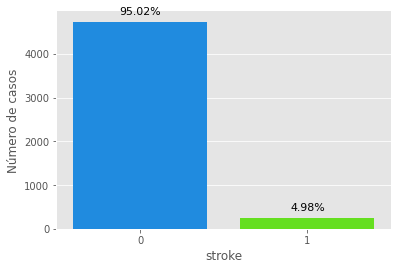

In [35]:
ax = sns.countplot(x="stroke",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de casos")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

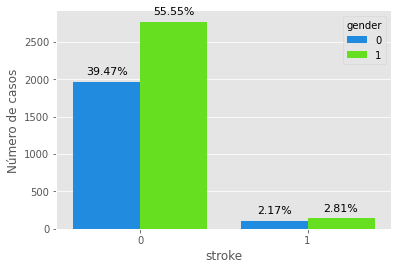

In [36]:
ax = sns.countplot(x="stroke",hue="gender",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de casos")
annot_plot(ax)
plt.show()

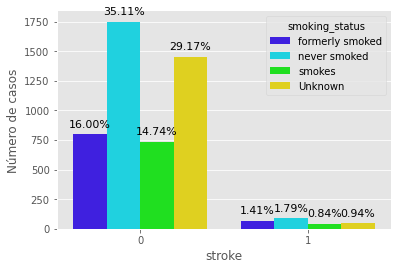

In [37]:
ax = sns.countplot(x="stroke",hue="smoking_status",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de casos")
annot_plot(ax)
plt.show()

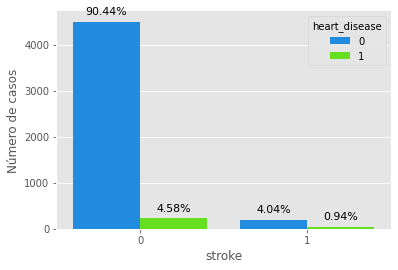

In [38]:
ax = sns.countplot(x="stroke",hue="heart_disease",data=df, palette="gist_rainbow_r")
plt.ylabel("Número de casos")
annot_plot(ax)
plt.show()

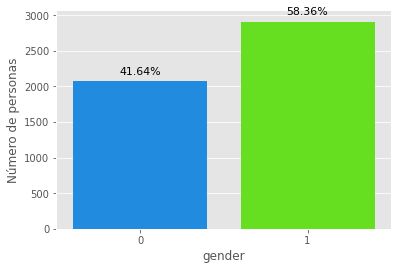

1    2907
0    2074
Name: gender, dtype: int64

In [39]:
# male and female
ax = sns.countplot(x=df.gender,data=df, palette="gist_rainbow_r")
plt.ylabel("Número de personas")
annot_plot(ax)
plt.show()
df.gender.value_counts()

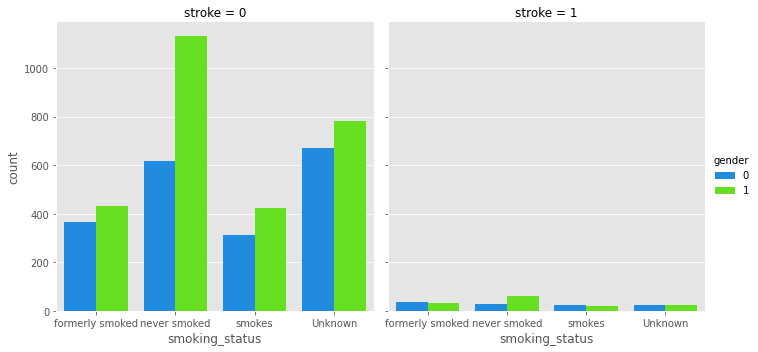

In [40]:
# smoking_status 
ax = sns.catplot(x = 'smoking_status',  hue= 'gender', data=df, palette='gist_rainbow_r' , col='stroke' , kind= 'count')
plt.ylabel("Número de personas")
#annot_plot(ax)   ----> me da error este def para el tipo de grafico sns.catplot
plt.show()


#sebastian como le pongo los % encima de cada barra? eso lo hacia el annot_plot pero no funciona con este tipo de grafico

Estas graficas las relacionaria con stroke o no stroke para que sean mas informativas

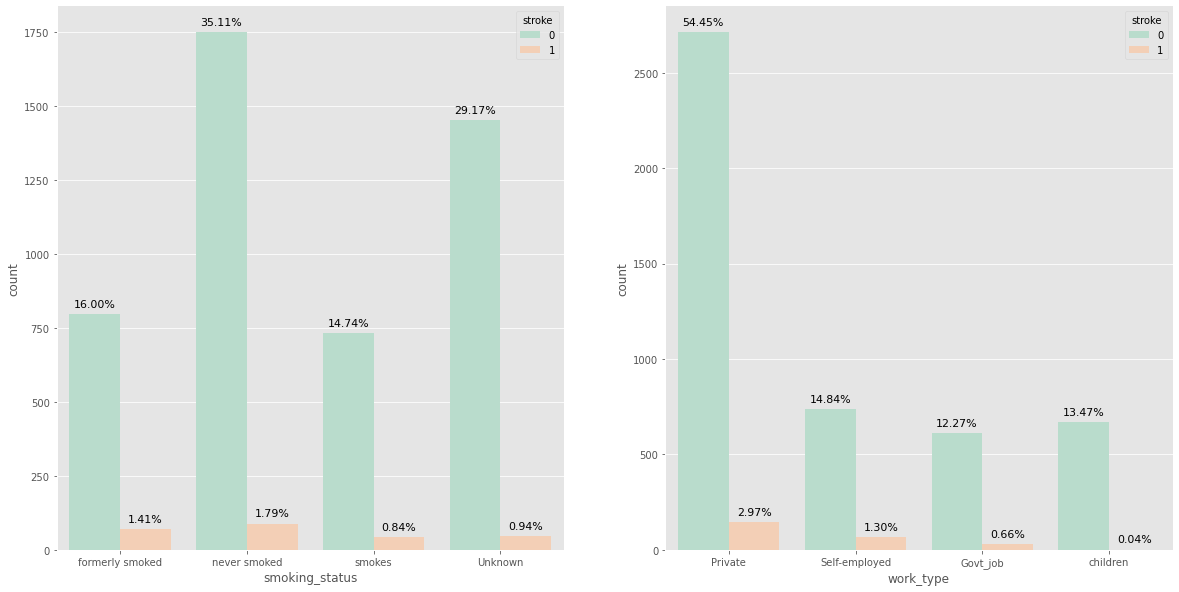

In [41]:
variables_categoricas=["smoking_status",'work_type' ]

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
for i,item in enumerate(variables_categoricas): #enumerate() 
    plt.subplot(1,2,(i+1))
    ax = sns.countplot(x=item, hue="stroke", data=df, palette="Pastel2")
    plt.xlabel(str(item))
    #plt.title("stroke by "+str(item))
    i=i+1
    annot_plot(ax)
plt.show()

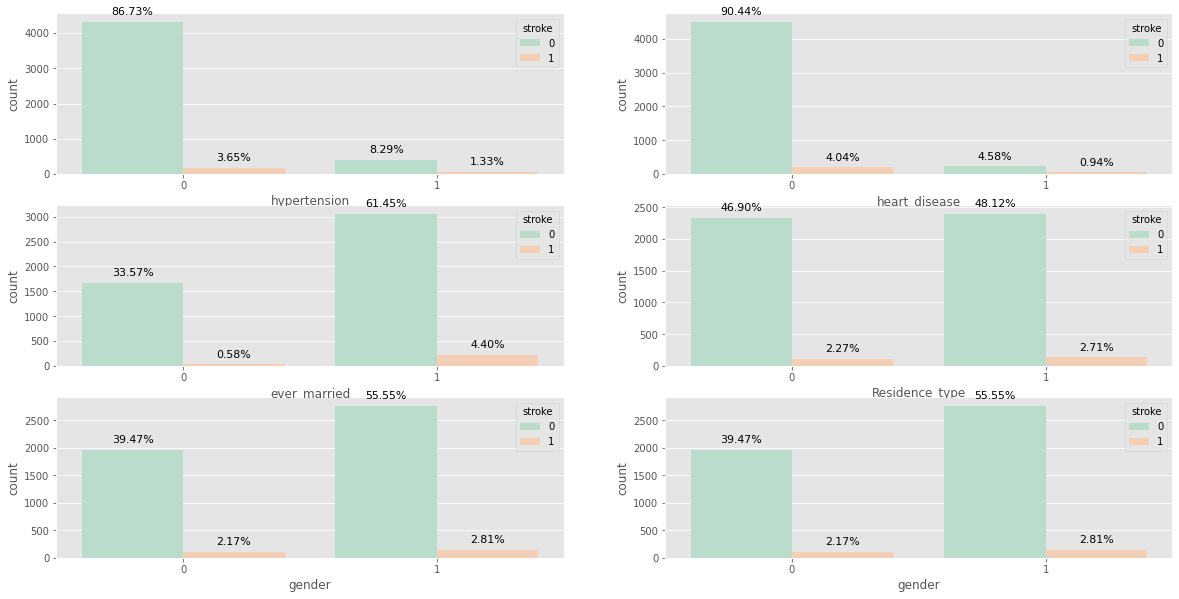

In [42]:
variables_binarias=["hypertension",'heart_disease',"ever_married",  "Residence_type" , "gender", "gender" ]

fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i,item in enumerate(variables_binarias): #enumerate()函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    plt.subplot(3,2,(i+1))
    ax = sns.countplot(x=item,hue="stroke",data=df,palette="Pastel2")
    plt.xlabel(str(item))
    #plt.title("stroke by "+str(item))
    i=i+1
    annot_plot(ax)
plt.show()

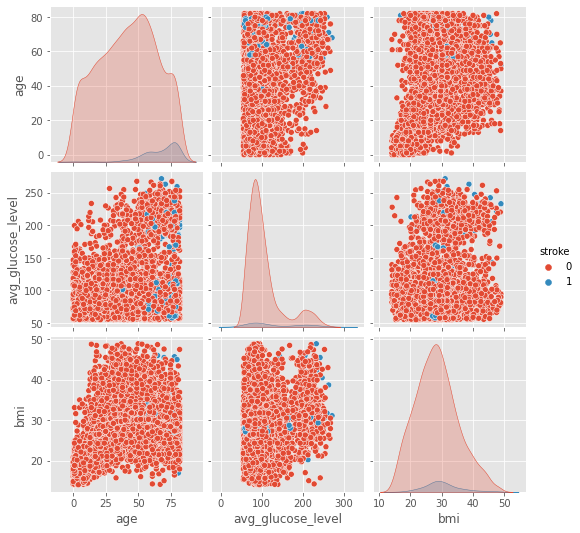

In [43]:
sns.pairplot(df, hue='stroke', vars=[ "age", "avg_glucose_level" , "bmi"])  

<AxesSubplot:xlabel='hypertension', ylabel='age'>

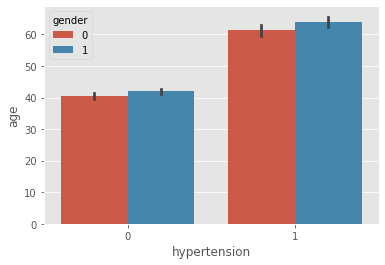

In [44]:
sns.barplot(x='hypertension', y='age', hue='gender', data=df, estimator=np.mean)

In [71]:
fig = px.scatter_3d(df, x='age', y='avg_glucose_level', z='bmi',
              color='stroke', color_continuous_scale='bluered', opacity=0.5)
fig.show()

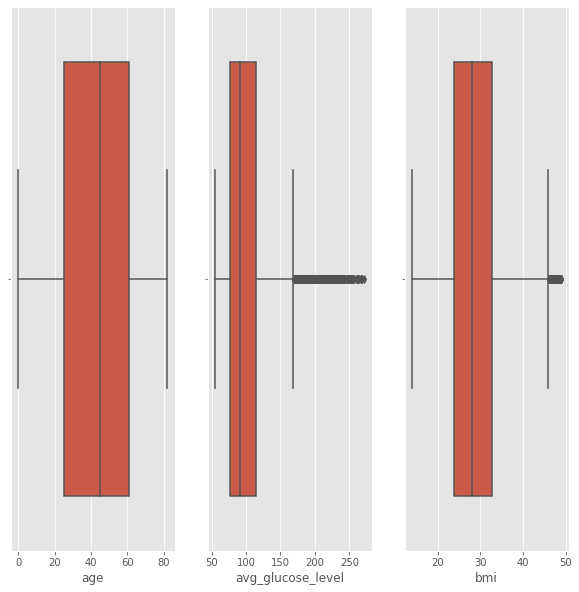

In [45]:
columns=['age', 'avg_glucose_level', 'bmi']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(10,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sns.boxplot(data=df, x=columns[i], ax=ax[i])
plt.show()

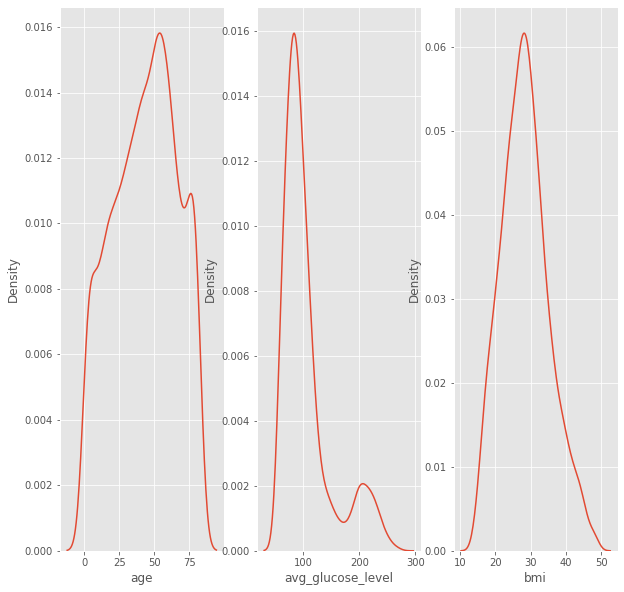

In [46]:
columns=['age', 'avg_glucose_level', 'bmi']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(10,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sns.kdeplot(data=df, x=columns[i], ax=ax[i])
plt.show()

# Limpieza de *outliers*

In [47]:
out_young= df[(df["age"]<15) & (df["stroke"]==1) ]
out_young

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,1,14,0,0,0,children,0,57.93,30.9,Unknown,1
4807,1,1,0,0,0,children,1,70.37,18.7,Unknown,1


In [48]:
out_young_idx=(df[df["age"]<=15].index) &  (df[df['stroke']==1].index)
out_young_idx

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


Int64Index([205, 4807], dtype='int64')

In [49]:
#df= df.drop(out_young_idx)

In [50]:
smokers_kids = df[(df['age']<18) & (df['smoking_status'])]
smokers_kids.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,1,14,0,0,0,children,0,57.93,30.9,Unknown,1
208,0,3,0,0,0,children,0,95.12,18.0,Unknown,0
210,1,8,0,0,0,Private,1,110.89,17.6,Unknown,0
237,1,3,0,0,0,children,1,73.74,16.0,Unknown,0
239,0,14,0,0,0,Govt_job,1,82.34,31.6,Unknown,0


In [51]:
workers_kids= df[(df['age']<18) & (df['work_type'])]
workers_kids.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,1,14,0,0,0,children,0,57.93,30.9,Unknown,1
208,0,3,0,0,0,children,0,95.12,18.0,Unknown,0
210,1,8,0,0,0,Private,1,110.89,17.6,Unknown,0
237,1,3,0,0,0,children,1,73.74,16.0,Unknown,0
239,0,14,0,0,0,Govt_job,1,82.34,31.6,Unknown,0


## Transformamos las variables para evaluar su correlacion antes de separar la variable a predecir de las variables predictoras.

In [25]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

var_numer = ["age", "avg_glucose_level" , "bmi" , "hypertension", "heart_disease" ]

var_categ= ["work_type" , "smoking_status" , "gender", "ever_married" , "Residence_type" , "stroke"]

#Configuro los transformer
transformer_var_numer = ("transformer_var_numer",MinMaxScaler(), var_numer) 
transformer_var_categ = ("transformer_var_categ",OneHotEncoder(), var_categ)

#Defino el transformer
transformer_variables = ColumnTransformer ([transformer_var_numer, transformer_var_categ ], remainder="passthrough")

In [53]:
df_tranformed = transformer_variables.fit_transform(df) 
peso_variables= pd.DataFrame(df_tranformed, columns= transformer_variables.get_feature_names_out()).corr(method='spearman')
peso_variables

,transformer_var_numer__age,transformer_var_numer__avg_glucose_level,transformer_var_numer__bmi,transformer_var_numer__hypertension,transformer_var_numer__heart_disease,transformer_var_categ__work_type_Govt_job,transformer_var_categ__work_type_Private,transformer_var_categ__work_type_Self-employed,transformer_var_categ__work_type_children,transformer_var_categ__smoking_status_Unknown,...,transformer_var_categ__smoking_status_never smoked,transformer_var_categ__smoking_status_smokes,transformer_var_categ__gender_0,transformer_var_categ__gender_1,transformer_var_categ__ever_married_0,transformer_var_categ__ever_married_1,transformer_var_categ__Residence_type_0,transformer_var_categ__Residence_type_1,transformer_var_categ__stroke_0,transformer_var_categ__stroke_1
transformer_var_numer__age,1.000000,0.142415,0.376876,0.282578,0.271150,0.120193,0.082855,0.328032,-0.590864,-0.354613,...,0.107486,0.059699,-0.017968,0.017968,-0.661367,0.661367,-0.016912,0.016912,-0.251251,0.251251
transformer_var_numer__avg_glucose_level,0.142415,1.000000,0.121999,0.110959,0.109575,-0.001363,0.016052,0.028764,-0.052839,-0.052370,...,0.013637,0.012976,0.049636,-0.049636,-0.094302,0.094302,0.009397,-0.009397,-0.082897,0.082897
transformer_var_numer__bmi,0.376876,0.121999,1.000000,0.168850,0.076483,0.088791,0.204886,0.095230,-0.486002,-0.294465,...,0.103980,0.101608,0.011811,-0.011811,-0.386216,0.386216,-0.007720,0.007720,-0.062258,0.062258
transformer_var_numer__hypertension,0.282578,0.110959,0.168850,1.000000,0.111974,0.016378,-0.004177,0.110468,-0.128924,-0.139901,...,0.065267,0.030749,0.021485,-0.021485,-0.164534,0.164534,0.004755,-0.004755,-0.131965,0.131965
transformer_var_numer__heart_disease,0.271150,0.109575,0.076483,0.111974,1.000000,0.001166,-0.001600,0.087474,-0.092974,-0.066710,...,-0.022727,0.044011,0.086476,-0.086476,-0.114765,0.114765,-0.002125,0.002125,-0.134610,0.134610
transformer_var_categ__work_type_Govt_job,0.120193,-0.001363,0.088791,0.016378,0.001166,1.000000,-0.447467,-0.169061,-0.152306,-0.096437,...,0.045091,0.030804,-0.017176,0.017176,-0.133655,0.133655,-0.013925,0.013925,-0.002574,0.002574
transformer_var_categ__work_type_Private,0.082855,0.016052,0.204886,-0.004177,-0.001600,-0.447467,1.000000,-0.509458,-0.458968,-0.210882,...,0.109936,0.096769,-0.028706,0.028706,-0.146139,0.146139,0.016104,-0.016104,-0.010459,0.010459
transformer_var_categ__work_type_Self-employed,0.328032,0.028764,0.095230,0.110468,0.087474,-0.169061,-0.509458,1.000000,-0.173407,-0.106007,...,0.030898,-0.003396,-0.029635,0.029635,-0.191668,0.191668,-0.013427,0.013427,-0.062643,0.062643
transformer_var_categ__work_type_children,-0.590864,-0.052839,-0.486002,-0.128924,-0.092974,-0.152306,-0.458968,-0.173407,1.000000,0.513777,...,-0.236529,-0.166553,0.090275,-0.090275,0.548851,-0.548851,0.004825,-0.004825,0.085075,-0.085075
transformer_var_categ__smoking_status_Unknown,-0.354613,-0.052370,-0.294465,-0.139901,-0.066710,-0.096437,-0.210882,-0.106007,0.513777,1.000000,...,-0.501989,-0.281995,0.059858,-0.059858,0.335689,-0.335689,0.003937,-0.003937,0.055699,-0.055699


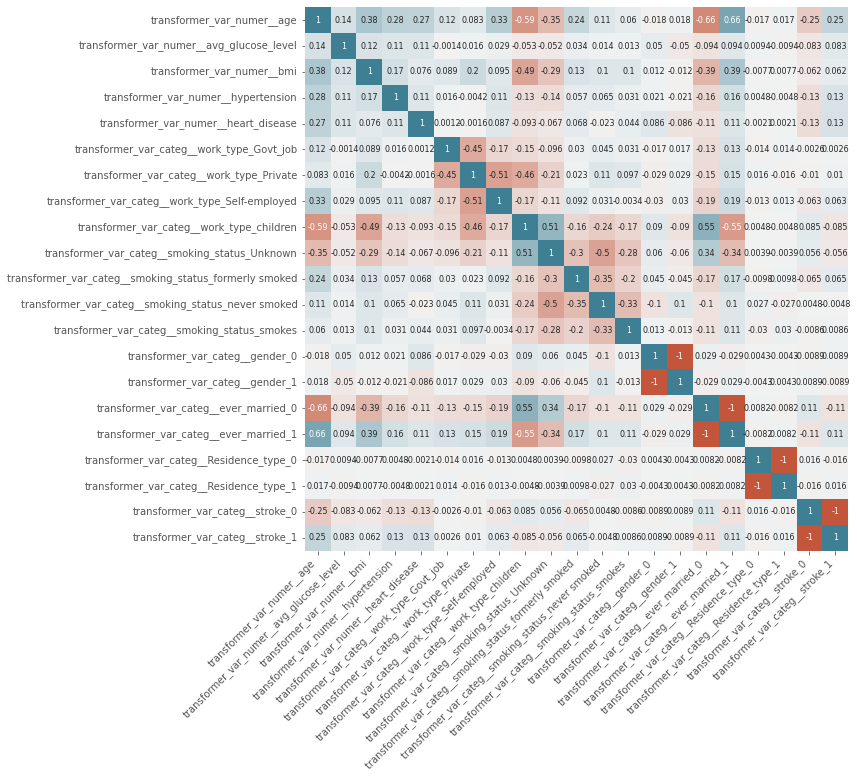

In [54]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.heatmap(
    peso_variables,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

# Definimos X , y

In [26]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

numericas = ["age", "avg_glucose_level" , "bmi" , "hypertension", "heart_disease"]
categoricas= ["work_type" , "smoking_status" , "gender", "ever_married" , "Residence_type"]

#Configuro los transformer
transformer_numerico = ("transformer_numerico",MinMaxScaler(), numericas) 
transformer_categorico = ("transformer_categorico",OneHotEncoder(), categoricas)

#Defino el transformer
transformer = ColumnTransformer ([transformer_numerico, transformer_categorico ], remainder="passthrough")

In [27]:
X = df.drop('stroke',axis=1)
y= df['stroke']
X_ub = transformer.fit_transform(X) 
var_desbalanceadas= pd.DataFrame(X_ub, columns= transformer.get_feature_names_out()).corr(method='spearman')
var_desbalanceadas

,transformer_numerico__age,transformer_numerico__avg_glucose_level,transformer_numerico__bmi,transformer_numerico__hypertension,transformer_numerico__heart_disease,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,transformer_categorico__work_type_children,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__gender_0,transformer_categorico__gender_1,transformer_categorico__ever_married_0,transformer_categorico__ever_married_1,transformer_categorico__Residence_type_0,transformer_categorico__Residence_type_1
transformer_numerico__age,1.000000,0.142415,0.376876,0.282578,0.271150,0.120193,0.082855,0.328032,-0.590864,-0.354613,0.235161,0.107486,0.059699,-0.017968,0.017968,-0.661367,0.661367,-0.016912,0.016912
transformer_numerico__avg_glucose_level,0.142415,1.000000,0.121999,0.110959,0.109575,-0.001363,0.016052,0.028764,-0.052839,-0.052370,0.033597,0.013637,0.012976,0.049636,-0.049636,-0.094302,0.094302,0.009397,-0.009397
transformer_numerico__bmi,0.376876,0.121999,1.000000,0.168850,0.076483,0.088791,0.204886,0.095230,-0.486002,-0.294465,0.126766,0.103980,0.101608,0.011811,-0.011811,-0.386216,0.386216,-0.007720,0.007720
transformer_numerico__hypertension,0.282578,0.110959,0.168850,1.000000,0.111974,0.016378,-0.004177,0.110468,-0.128924,-0.139901,0.056797,0.065267,0.030749,0.021485,-0.021485,-0.164534,0.164534,0.004755,-0.004755
transformer_numerico__heart_disease,0.271150,0.109575,0.076483,0.111974,1.000000,0.001166,-0.001600,0.087474,-0.092974,-0.066710,0.067541,-0.022727,0.044011,0.086476,-0.086476,-0.114765,0.114765,-0.002125,0.002125
transformer_categorico__work_type_Govt_job,0.120193,-0.001363,0.088791,0.016378,0.001166,1.000000,-0.447467,-0.169061,-0.152306,-0.096437,0.029833,0.045091,0.030804,-0.017176,0.017176,-0.133655,0.133655,-0.013925,0.013925
transformer_categorico__work_type_Private,0.082855,0.016052,0.204886,-0.004177,-0.001600,-0.447467,1.000000,-0.509458,-0.458968,-0.210882,0.022685,0.109936,0.096769,-0.028706,0.028706,-0.146139,0.146139,0.016104,-0.016104
transformer_categorico__work_type_Self-employed,0.328032,0.028764,0.095230,0.110468,0.087474,-0.169061,-0.509458,1.000000,-0.173407,-0.106007,0.092186,0.030898,-0.003396,-0.029635,0.029635,-0.191668,0.191668,-0.013427,0.013427
transformer_categorico__work_type_children,-0.590864,-0.052839,-0.486002,-0.128924,-0.092974,-0.152306,-0.458968,-0.173407,1.000000,0.513777,-0.161310,-0.236529,-0.166553,0.090275,-0.090275,0.548851,-0.548851,0.004825,-0.004825
transformer_categorico__smoking_status_Unknown,-0.354613,-0.052370,-0.294465,-0.139901,-0.066710,-0.096437,-0.210882,-0.106007,0.513777,1.000000,-0.301350,-0.501989,-0.281995,0.059858,-0.059858,0.335689,-0.335689,0.003937,-0.003937


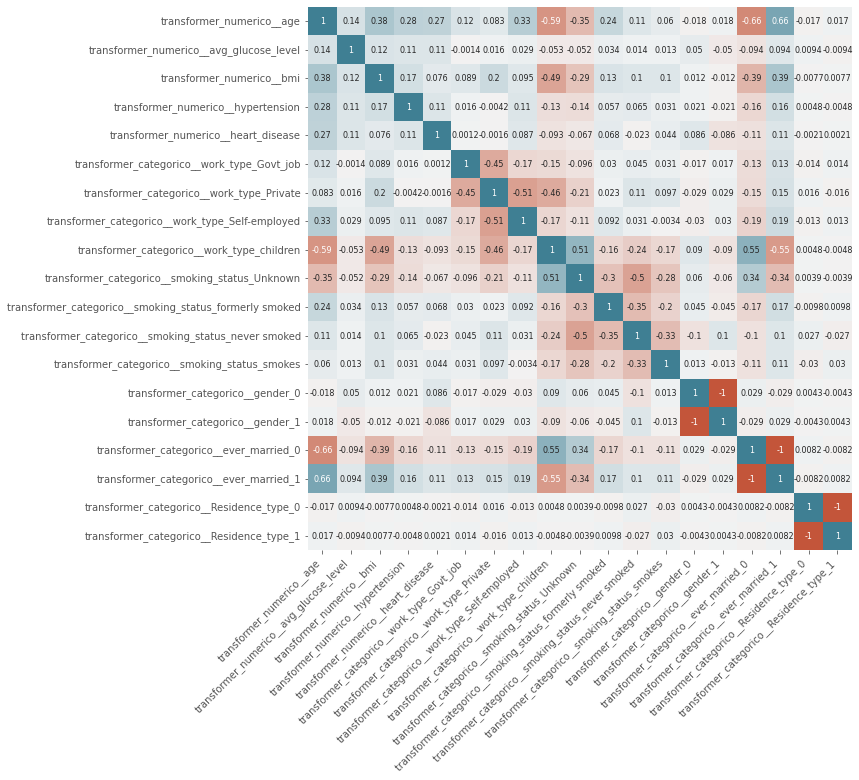

In [28]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    var_desbalanceadas,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


# Algoritmos Ensamble

## 1. GradientBoost ---> GradientBoostClassifier
## 2. Ramdom Forest ---> Ramdom ForestClassifier
## 3. AdaBoost ---> AdaBoostClassifier
## 4. XgBoost ----> XgBoostClassifier
## 5. LgBoost--->LGBMClassifier(),
## 6. CatBoost--->CatBoostClassifier(verbose=False)
    
### El ultimo algoritmo a correr
## 7. VotingClassifier


# Corrida base con datos desbalanceados

# GradienBoostingClassifier -----> datos desbalanceados

In [58]:
from sklearn.model_selection import train_test_split
X_train_ub, X_test_ub, y_train_ub, y_test_ub = train_test_split(X_ub, y, test_size=0.20, random_state=101, stratify=y)

In [53]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_ub = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_ub.fit(X = X_train_ub, y = y_train_ub)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_ub.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_ub.best_params_, ":", grid_GBC_ub.best_score_, grid_GBC_ub.scoring)



Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.001, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50, 'subsample': 0.5} : 0.9505370767168144 accuracy


In [54]:
# GBC con optimización de hiperparámetros
modelo_GBC_ub = grid_GBC_ub.best_estimator_
#Accuracy del modelo
GBC_accuracy_ub = grid_GBC_ub.best_score_

In [55]:
# Cross Validation
cv_GBC_ub = cross_validate(modelo_GBC_ub, X_ub, y, cv=10)
sorted(cv_GBC_ub.keys())
cv_GBC_ub['test_score']

array([0.9497992 , 0.9497992 , 0.9497992 , 0.9497992 , 0.9497992 ,
       0.9497992 , 0.95180723, 0.95180723, 0.95180723, 0.95171026])

In [56]:
# Accuracy cross_validatation
cv_GBC_acc_ub =sum(cv_GBC_ub['test_score'])/len(cv_GBC_ub['test_score'])
cv_GBC_acc_ub

0.9505927129039298


El accuracy de test es: 95.08 %

El accuracy del train es: 95.05 %

El overfitting del test y train es 0.03 % 

El accuracy del cross_validate es: 95.06 %

El overfitting del cross_validate (test) y train es 0.01 % 


Matriz de confusión



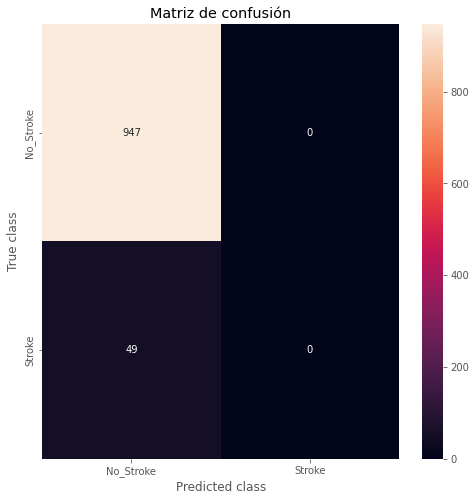


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        49

    accuracy                           0.95       996
   macro avg       0.48      0.50      0.49       996
weighted avg       0.90      0.95      0.93       996


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3786
           1       0.00      0.00      0.00       197

    accuracy                           0.95      3983
   macro avg       0.48      0.50      0.49      3983
weighted avg       0.90      0.95      0.93      3983




/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [57]:
# Prediccion y evaluacion del modelo
y_pred_ub= modelo_GBC_ub.predict(X_test_ub)
y_pred_train_ub= modelo_GBC_ub.predict(X_train_ub)

#Accuracy del modelo
accuracy_test_predict= accuracy_score(y_test_ub, y_pred_ub)
#Accuracy del train
accuracy_train_ub = accuracy_score(y_train_ub,y_pred_train_ub)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_ub))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict - accuracy_train_ub)/accuracy_test_predict) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_acc_ub))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_acc_ub - accuracy_train_ub)/accuracy_test_predict) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test_ub, y_pred_ub):
    conf_matrix = confusion_matrix(y_test_ub, y_pred_ub)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test_ub, y_pred_ub))
    
mostrar_resultados(y_test_ub, y_pred_ub)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_ub,y_pred_train_ub))
print("")

# Comparación de métodos para balanceo de datos

# Estrategias para el manejo de datos desbalanceados

* ## **Estrategia 1:** Penalización para compensación (`sample_weight`)
* ## **Estrategia 2:** Subsampling en la clase mayoritaria (`NearMiss`)
* ## **Estrategia 3 :** UnderSampling (`RandomUnderSampler`)
* ## **Estrategia 4 :** UnderSample: `CondensedNearestNeighbour`
* ## **Estrategia 5:** Oversampling de la clase minoritaria (`RandomOverSampler`)
* ## **Estrategia 6:** Combinamos resampling con Smote-Tomek (`SMOTETomek`)
* ## **Estrategia 7:** Ensamble de Modelos con Balanceo (`BalancedBaggingClassifier`)


In [58]:
#X = df.drop('stroke',axis=1)
#y= df['stroke']
#X_ub = transformer.fit_transform(X) 
#X_train_ub, X_test_ub, y_train_ub, y_test_ub = train_test_split(X_ub, y, test_size=0.20, random_state=101, stratify=y)

## Estrategia 2: Subsampling en la clase mayoritaria (`NearMiss`)



In [30]:
from collections import Counter
from imblearn.under_sampling import NearMiss
nr = NearMiss()

In [31]:
#X = df.drop('stroke',axis=1)
#y= df['stroke']
X_t = transformer.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.20, random_state=101, stratify=y)

X_train_nr, y_train_nr = nr.fit_resample(X_train,y_train) 

# GradienBoostingClassifier -----> `NearMiss`

In [66]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_nr = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_nr.fit(X = X_train_nr, y = y_train_nr)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_nr.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_nr.best_params_, ":", grid_GBC_nr.best_score_, grid_GBC_nr.scoring)

# Guardamos el mejor modelo
modelo_GBC_nr = grid_GBC_nr.best_estimator_
#Accuracy del modelo
GBC_accuracy_nr = grid_GBC_nr.best_score_

Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.5} : 0.8383838383838383 accuracy


In [67]:
#Cross_validation con optimizacion de hiperparámetros
cv_GBC_nr = cross_validate(modelo_GBC_nr, X_t, y, cv=10)
sorted(cv_GBC_nr.keys())
cv_GBC_nr['test_score']

array([0.9498998 , 0.9497992 , 0.94779116, 0.94779116, 0.94176707,
       0.95180723, 0.95180723, 0.95381526, 0.95180723, 0.94578313])

In [68]:
#Media de cv_results (accuracy cross_validate)
cv_GBC_acc_nr =sum(cv_GBC_nr['test_score'])/len(cv_GBC_nr['test_score'])


accuracy_test: 23.57 %

accuracy_train: 93.18 %

overfitting test/train -295.33 % 

accuracy_cross_validate: 94.92 %

overfitting_cross_validate test/train 7.38 % 


Matriz de confusión



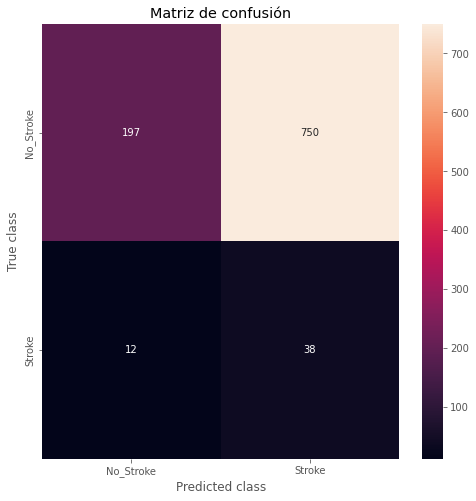


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.94      0.21      0.34       947
           1       0.05      0.76      0.09        50

    accuracy                           0.24       997
   macro avg       0.50      0.48      0.22       997
weighted avg       0.90      0.24      0.33       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       198
           1       0.96      0.90      0.93       198

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396


Distribution before resampling Counter({0: 3786, 1: 198})
Distribution after resampling Counter({0: 198, 1: 198})


In [69]:
# Prediccion y evaluacion del modelo
y_pred_nr= modelo_GBC_nr.predict(X_test)
y_pred_train_nr= modelo_GBC_nr.predict(X_train_nr)

#Accuracy del modelo
accuracy_test_predict_nr= accuracy_score(y_test, y_pred_nr)
#Accuracy del train
accuracy_train_nr = accuracy_score(y_train_nr, y_pred_train_nr)

print("")
print("accuracy_test: {:.2f} %".format(100 * accuracy_test_predict_nr))
print("")
print("accuracy_train: {:.2f} %".format(100 * accuracy_train_nr))
print("")
print("overfitting test/train {:.2f} % ".format(((accuracy_test_predict_nr - accuracy_train_nr)/accuracy_test_predict_nr) *100))
print("")
print("accuracy_cross_validate: {:.2f} %".format(100 * cv_GBC_acc_nr))
print("")
print("overfitting_cross_validate test/train {:.2f} % ".format(((cv_GBC_acc_nr - accuracy_train_nr)/accuracy_test_predict_nr) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred_nr):
    conf_matrix = confusion_matrix(y_test, y_pred_nr)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_nr))
    
mostrar_resultados(y_test, y_pred_nr)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_nr,y_pred_train_nr))
print("")
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_nr)))

# Estrategia 3 : UnderSampling (`RandomUnderSampler`)

In [72]:
from imblearn.under_sampling import RandomUnderSampler  

rus = RandomUnderSampler(sampling_strategy=1) # Float 
 
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train) 

## GradienBoostingClassifier -----> `RandomUnderSampler`

In [73]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_rus = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_rus.fit(X = X_train_rus, y = y_train_rus)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados_rus = pd.DataFrame(grid_GBC_rus.cv_results_)
resultados_rus.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_rus.best_params_, ":", grid_GBC_rus.best_score_, grid_GBC_rus.scoring)

# Guardamos el mejor modelo
modelo_GBC_rus = grid_GBC_rus.best_estimator_
#Accuracy del modelo
GBC_accuracy_rus = grid_GBC_rus.best_score_

Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 0.5} : 0.7651515151515151 accuracy


In [74]:
# Cross Validation
cv_GBC_rus = cross_validate(modelo_GBC_rus, X_t, y, cv=10)
sorted(cv_GBC_rus.keys())
cv_GBC_rus['test_score']

array([0.9498998 , 0.9497992 , 0.9497992 , 0.9497992 , 0.9497992 ,
       0.9497992 , 0.9497992 , 0.9497992 , 0.95180723, 0.95180723])

In [75]:
# Accuracy cross_validation
cv_GBC_acc_rus =sum(cv_GBC_rus['test_score'])/len(cv_GBC_rus['test_score'])


El accuracy de test es: 68.91 %

El accuracy del train es: 82.58 %

El overfitting del test y train es -19.84 % 

El accuracy del cross_validate es: 95.02 %

El overfitting del cross_validate (test) y train es 18.06 % 


Matriz de confusión



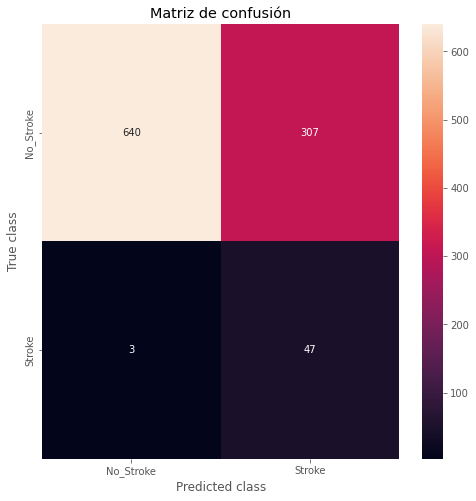


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       1.00      0.68      0.81       947
           1       0.13      0.94      0.23        50

    accuracy                           0.69       997
   macro avg       0.56      0.81      0.52       997
weighted avg       0.95      0.69      0.78       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       198
           1       0.78      0.91      0.84       198

    accuracy                           0.83       396
   macro avg       0.84      0.83      0.82       396
weighted avg       0.84      0.83      0.82       396


Distribution before resampling Counter({0: 3786, 1: 198})
Distribution after resampling Counter({0: 198, 1: 198})


In [76]:
# Prediccion y evaluacion del modelo
y_pred_rus= modelo_GBC_rus.predict(X_test)
y_pred_train_rus= modelo_GBC_rus.predict(X_train_rus)

#Accuracy del modelo
accuracy_test_predict_rus= accuracy_score(y_test, y_pred_rus)
#Accuracy del train
accuracy_train_rus = accuracy_score(y_train_rus,y_pred_train_rus)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict_rus))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_rus))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict_rus - accuracy_train_rus)/accuracy_test_predict_rus) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_acc_rus))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_acc_rus - accuracy_train_rus)/accuracy_test_predict_rus) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred_rus):
    conf_matrix = confusion_matrix(y_test, y_pred_rus)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_rus))
    
mostrar_resultados(y_test, y_pred_rus)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_rus,y_pred_train_rus))
print("")
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_rus)))

In [84]:
#Importancia de las variables

importances_GBC_rus = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_GBC_rus.feature_importances_
})
importances_GBC_rus = importances_GBC_rus.sort_values(by='Importance', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
#Grafico de barras de fetures_importance

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Estrategia 4 : UnderSample: `CondensedNearestNeighbour`

In [77]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(n_neighbors=1)

X_train_cnn, y_train_cnn = cnn.fit_resample(X_train,y_train) 

## GradienBoostingClassifier -----> `CondensedNearestNeighbour`

In [78]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_cnn = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_cnn.fit(X = X_train_cnn, y = y_train_cnn)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados_cnn = pd.DataFrame(grid_GBC_cnn.cv_results_)
resultados_cnn.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_cnn.best_params_, ":", grid_GBC_cnn.best_score_, grid_GBC_cnn.scoring)

# Guardamos el mejor modelo
modelo_GBC_cnn = grid_GBC_cnn.best_estimator_
#Accuracy del modelo
GBC_accuracy_cnn = grid_GBC_cnn.best_score_

Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100, 'subsample': 0.5} : 0.7394179894179894 accuracy


In [79]:
# Cross Validation
cv_GBC_cnn = cross_validate(modelo_GBC_cnn, X_t, y, cv=10)
sorted(cv_GBC_cnn.keys())
cv_GBC_cnn['test_score']

array([0.9498998 , 0.9497992 , 0.9497992 , 0.9497992 , 0.9497992 ,
       0.9497992 , 0.9497992 , 0.9497992 , 0.95180723, 0.95180723])

In [80]:
# Accuracy cross_validation
cv_GBC_acc_cnn =sum(cv_GBC_cnn['test_score'])/len(cv_GBC_cnn['test_score'])


El accuracy de test es: 94.98 %

El accuracy del train es: 74.07 %

El overfitting del test y train es 22.01 % 

El accuracy del cross_validate es: 95.02 %

El overfitting del cross_validate (test) y train es 22.05 % 


Matriz de confusión



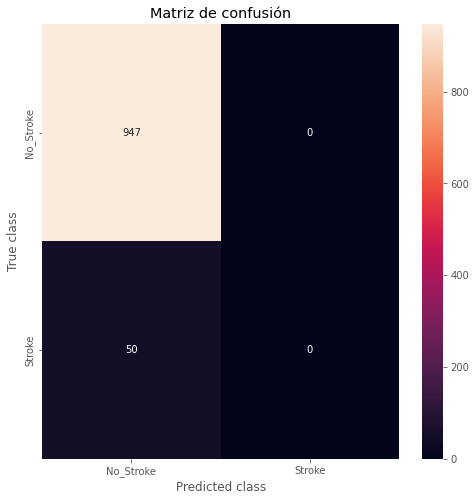


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       558
           1       1.00      0.01      0.02       198

    accuracy                           0.74       756
   macro avg       0.87      0.51      0.44       756
weighted avg       0.81      0.74      0.63       756


Distribution before resampling Counter({0: 3786, 1: 198})
Distribution after resampling Counter({0: 558, 1: 198})


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [82]:
# Prediccion y evaluacion del modelo
y_pred_cnn= modelo_GBC_cnn.predict(X_test)
y_pred_train_cnn= modelo_GBC_cnn.predict(X_train_cnn)

#Accuracy del modelo
accuracy_test_predict_cnn= accuracy_score(y_test, y_pred_cnn)
#Accuracy del train
accuracy_train_cnn = accuracy_score(y_train_cnn, y_pred_train_cnn)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict_cnn))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_cnn))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict_cnn - accuracy_train_cnn)/accuracy_test_predict_cnn) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_acc_cnn))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_acc_cnn - accuracy_train_cnn)/accuracy_test_predict_cnn) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred_cnn):
    conf_matrix = confusion_matrix(y_test, y_pred_cnn)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_cnn))
    
mostrar_resultados(y_test, y_pred_cnn)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_cnn, y_pred_train_cnn))
print("")
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_cnn)))

# Estrategia 5: Oversampling de la clase minoritaria (`RandomOverSampler`)

In [86]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(random_state=0)

X_train_os, y_train_os = os.fit_resample(X_train,y_train) 

## GradienBoostingClassifier -----> `RandomOverSampler`

In [87]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_os = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_os.fit(X = X_train_os, y = y_train_os)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_os.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_os.best_params_, ":", grid_GBC_os.best_score_, grid_GBC_os.scoring)

# Guardamos el mejor modelo
modelo_GBC_os = grid_GBC_os.best_estimator_
#Accuracy del modelo
GBC_accuracy_os = grid_GBC_os.best_score_

Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000, 'subsample': 1} : 0.9927363972530374 accuracy


In [88]:
# Cross Validation
cv_GBC_os = cross_validate(modelo_GBC_os, X_t, y, cv=10)
sorted(cv_GBC_os.keys())
cv_GBC_os['test_score']

array([0.9498998 , 0.9497992 , 0.9497992 , 0.9497992 , 0.9497992 ,
       0.9497992 , 0.9497992 , 0.9497992 , 0.95180723, 0.95180723])

In [89]:
# Accuracy cross_validation
cv_GBC_mean_os =sum(cv_GBC_os['test_score'])/len(cv_GBC_os['test_score'])


El accuracy de test es: 94.68 %

El accuracy del train es: 100.00 %

El overfitting del test y train es -5.61 % 

El accuracy del cross_validate es: 95.02 %

El overfitting del cross_validate (test) y train es -5.26 % 


Matriz de confusión



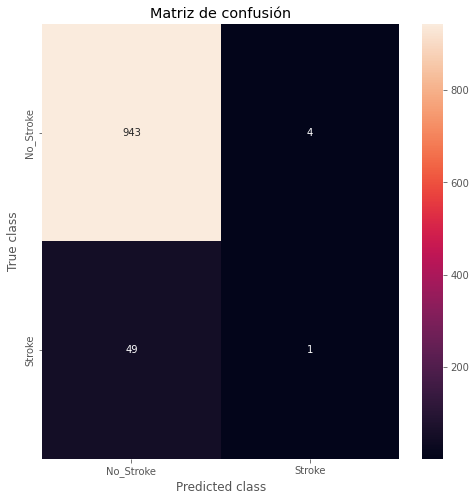


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.20      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.58      0.51      0.50       997
weighted avg       0.91      0.95      0.93       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3786
           1       1.00      1.00      1.00      3786

    accuracy                           1.00      7572
   macro avg       1.00      1.00      1.00      7572
weighted avg       1.00      1.00      1.00      7572


Distribution before resampling Counter({0: 3786, 1: 198})
Distribution after resampling Counter({0: 3786, 1: 3786})


In [90]:
# Prediccion y evaluacion del modelo
y_pred_os= modelo_GBC_os.predict(X_test)
y_pred_train_os= modelo_GBC_os.predict(X_train_os)

#Accuracy del modelo
accuracy_test_predict_os= accuracy_score(y_test, y_pred_os)
#Accuracy del train
accuracy_train_os = accuracy_score(y_train_os,y_pred_train_os)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict_os))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_os))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict_os - accuracy_train_os)/accuracy_test_predict_os) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_mean_os))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_mean_os - accuracy_train_os)/accuracy_test_predict_os) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred_os):
    conf_matrix = confusion_matrix(y_test, y_pred_os)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_os))
    
mostrar_resultados(y_test, y_pred_os)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_os,y_pred_train_os))
print("")
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_os)))

# Estrategia 6: Oversampling de la clase minoritaria (`Smote`)

In [32]:
from imblearn.over_sampling import SMOTE
sm =  SMOTE(random_state= 42 , sampling_strategy= 0.6)

X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)  

## GradienBoostingClassifier -----> `Smote`

In [34]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_sm = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_sm.fit(X = X_train_sm, y = y_train_sm)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_sm.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_sm.best_params_, ":", grid_GBC_sm.best_score_, grid_GBC_sm.scoring)

# Guardamos el mejor modelo
modelo_GBC_sm = grid_GBC_sm.best_estimator_
#Accuracy del modelo
GBC_accuracy_sm = grid_GBC_sm.best_score_

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 1} : 0.9504705299653292 accuracy


In [35]:
# Cross Validation
cv_GBC_sm = cross_validate(modelo_GBC_sm, X_t, y, cv=10)
sorted(cv_GBC_sm.keys())
cv_GBC_sm['test_score']

array([0.94589178, 0.94578313, 0.94578313, 0.9437751 , 0.937751  ,
       0.94779116, 0.93975904, 0.94578313, 0.9437751 , 0.94578313])

In [36]:
# Accuracy cross_validation
cv_GBC_acc_sm =sum(cv_GBC_sm['test_score'])/len(cv_GBC_sm['test_score'])


El accuracy de test es: 93.68 %

El accuracy del train es: 100.00 %

El overfitting del test y train es -6.75 % 

El accuracy del cross_validate es: 94.42 %

El overfitting del cross_validate (test) y train es -5.96 % 


Matriz de confusión



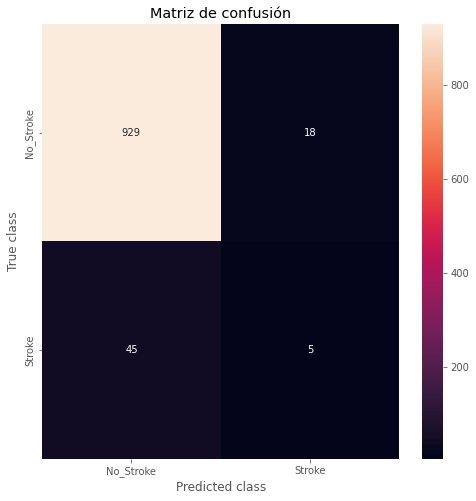


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       947
           1       0.22      0.10      0.14        50

    accuracy                           0.94       997
   macro avg       0.59      0.54      0.55       997
weighted avg       0.92      0.94      0.93       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3786
           1       1.00      1.00      1.00      2271

    accuracy                           1.00      6057
   macro avg       1.00      1.00      1.00      6057
weighted avg       1.00      1.00      1.00      6057


Distribution before resampling Counter({0: 3786, 1: 198})
Distribution after resampling Counter({0: 3786, 1: 2271})


In [37]:
# Prediccion y evaluacion del modelo
y_pred_sm= modelo_GBC_sm.predict(X_test)
y_pred_train_sm= modelo_GBC_sm.predict(X_train_sm)

#Accuracy del modelo
accuracy_test_predict_sm= accuracy_score(y_test, y_pred_sm)
#Accuracy del train
accuracy_train_sm = accuracy_score(y_train_sm,y_pred_train_sm)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict_sm))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_sm))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict_sm - accuracy_train_sm)/accuracy_test_predict_sm) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_acc_sm))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_acc_sm - accuracy_train_sm)/accuracy_test_predict_sm) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred_sm):
    conf_matrix = confusion_matrix(y_test, y_pred_sm)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_sm))
    
mostrar_resultados(y_test, y_pred_sm)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_sm,y_pred_train_sm))
print("")
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_sm)))

# Estrategia 7: Oversampling & Subsampling (`SMOTETomek`)

In [38]:
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()

X_train_st, y_train_st = os_us.fit_resample(X_train,y_train)  

## GradienBoostingClassifier -----> `SMOTETomek`

In [39]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_st = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_st.fit(X = X_train_st, y = y_train_st)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_st.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_st.best_params_, ":", grid_GBC_st.best_score_, grid_GBC_st.scoring)

# Guardamos el mejor modelo
modelo_GBC_st = grid_GBC_st.best_estimator_
#Accuracy del modelo
GBC_accuracy_st = grid_GBC_st.best_score_

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500, 'subsample': 1} : 0.9648117922219294 accuracy


In [40]:
# Cross Validation
cv_GBC_st = cross_validate(modelo_GBC_st, X_t, y, cv=10)
sorted(cv_GBC_st.keys())
cv_GBC_st['test_score']

array([0.94589178, 0.94578313, 0.94578313, 0.9437751 , 0.937751  ,
       0.94779116, 0.93975904, 0.94578313, 0.9437751 , 0.94578313])

In [41]:
# Accuracy cross_validation
cv_GBC_mean_st =sum(cv_GBC_st['test_score'])/len(cv_GBC_st['test_score'])


El accuracy de test es: 93.38 %

El accuracy del train es: 100.00 %

El overfitting del test y train es -7.09 % 

El accuracy del cross_validate es: 94.42 %

El overfitting del cross_validate (test) y train es -5.98 % 


Matriz de confusión



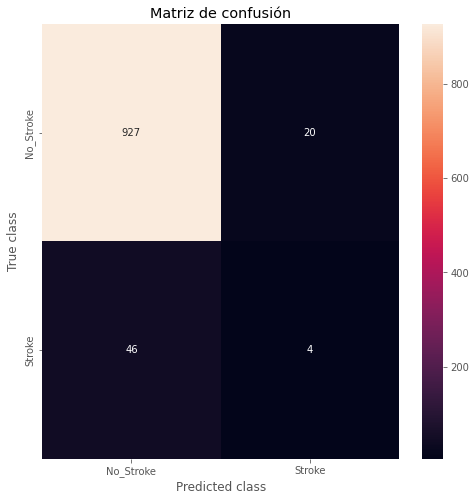


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       947
           1       0.17      0.08      0.11        50

    accuracy                           0.93       997
   macro avg       0.56      0.53      0.54       997
weighted avg       0.91      0.93      0.92       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3737
           1       1.00      1.00      1.00      3737

    accuracy                           1.00      7474
   macro avg       1.00      1.00      1.00      7474
weighted avg       1.00      1.00      1.00      7474


Distribution before resampling Counter({0: 3786, 1: 198})
Distribution after resampling Counter({0: 3737, 1: 3737})


In [42]:
# Prediccion y evaluacion del modelo
y_pred_st= modelo_GBC_st.predict(X_test)
y_pred_train_st= modelo_GBC_st.predict(X_train_st)

#Accuracy del modelo
accuracy_test_predict_st= accuracy_score(y_test, y_pred_st)
#Accuracy del train
accuracy_train_st = accuracy_score(y_train_st,y_pred_train_st)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict_st))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_st))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict_st - accuracy_train_st)/accuracy_test_predict_st) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_mean_st))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_mean_st - accuracy_train_st)/accuracy_test_predict_st) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred_st):
    conf_matrix = confusion_matrix(y_test, y_pred_st)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_st))
    
mostrar_resultados(y_test, y_pred_st)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train_st,y_pred_train_st))
print("")
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_st)))

# Estrategia 8: Ensamble de Modelos con Balanceo (`BalancedBaggingClassifier`)

In [45]:
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)

## GradienBoostingClassifier -----> `BalancedBaggingClassifier`

In [55]:
# Instanciamos el BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

# Grid de hiperparámetros evaluados
# ==============================================================================
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}


# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid_GBC_bbc = GridSearchCV(
        estimator  = bbc,
        param_grid = bc_params,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid_GBC_bbc.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
print("Resultados GridSearch ---->>> GradientBoostingClassifier")
resultados = pd.DataFrame(grid_GBC_bbc.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)
# Mejores hiperparámetros por validación cruzada GradientBoostingClassifier
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier")
print("----------------------------------------")
print(grid_GBC_bbc.best_params_, ":", grid_GBC_bbc.best_score_, grid_GBC_bbc.scoring)

# Guardamos el mejor modelo
modelo_GBC_bbc = grid_GBC_bbc.best_estimator_
#Accuracy del modelo
GBC_accuracy_bbc = grid_GBC_bbc.best_score_

Resultados GridSearch ---->>> GradientBoostingClassifier
----------------------------------------
Mejores hiperparámetros encontrados (cv) GradientBoostingClassifier
----------------------------------------
{'base_estimator__max_depth': 10, 'base_estimator__max_features': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'bootstrap_features': False, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 20} : 0.8034638554216867 accuracy


In [56]:
# Cross Validation
cv_GBC_bbc = cross_validate(modelo_GBC_bbc, X_t, y, cv=10)
sorted(cv_GBC_bbc.keys())
cv_GBC_bbc['test_score']

array([0.78957916, 0.81325301, 0.80120482, 0.81124498, 0.78915663,
       0.79518072, 0.79518072, 0.82329317, 0.77309237, 0.74497992])

In [57]:
# Accuracy cross_validation
cv_GBC_mean_bbc =sum(cv_GBC_bbc['test_score'])/len(cv_GBC_bbc['test_score'])


El accuracy de test es: 79.24 %

El accuracy del train es: 81.90 %

El overfitting del test y train es -3.36 % 

El accuracy del cross_validate es: 79.36 %

El overfitting del cross_validate (test) y train es -3.21 % 


Matriz de confusión



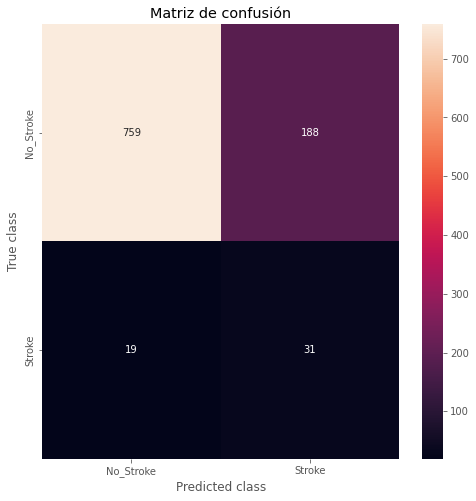


Reporte de Clasificación (test)
-------------------
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       947
           1       0.14      0.62      0.23        50

    accuracy                           0.79       997
   macro avg       0.56      0.71      0.56       997
weighted avg       0.93      0.79      0.85       997


Reporte de Clasificación (train)
-------------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      3786
           1       0.22      1.00      0.35       198

    accuracy                           0.82      3984
   macro avg       0.61      0.90      0.62      3984
weighted avg       0.96      0.82      0.87      3984




In [58]:
# Prediccion y evaluacion del modelo
y_pred_bbc= modelo_GBC_bbc.predict(X_test)
y_pred_train_bbc= modelo_GBC_bbc.predict(X_train)

#Accuracy del modelo
accuracy_test_predict_bbc= accuracy_score(y_test, y_pred_bbc)
#Accuracy del train
accuracy_train_bbc = accuracy_score(y_train,y_pred_train_bbc)

print("")
print("El accuracy de test es: {:.2f} %".format(100 * accuracy_test_predict_bbc))
print("")
print("El accuracy del train es: {:.2f} %".format(100 * accuracy_train_bbc))
print("")
print("El overfitting del test y train es {:.2f} % ".format(((accuracy_test_predict_bbc - accuracy_train_bbc)/accuracy_test_predict_bbc) *100))
print("")
print("El accuracy del cross_validate es: {:.2f} %".format(100 * cv_GBC_mean_bbc))
print("")
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_GBC_mean_bbc - accuracy_train_bbc)/accuracy_test_predict_bbc) *100))
print("")
print("")

#definimos funciona para mostrar los resultados
print("Matriz de confusión")
print("")

Labels= 'No_Stroke', 'Stroke'

def mostrar_resultados(y_test, y_pred__bbc):
    conf_matrix = confusion_matrix(y_test, y_pred_bbc)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print("")
    print("Reporte de Clasificación (test)")
    print("-------------------")
    print (classification_report(y_test, y_pred_bbc))
    
mostrar_resultados(y_test, y_pred_bbc)
print("")
print("Reporte de Clasificación (train)")
print("-------------------")
print (classification_report(y_train,y_pred_train_bbc))
print("")

# Regularización

# Cross Validation Scores

# Pesos y probabilidades de las variables


# Eleccion del mejor modelo